# 图像特效-钝化蒙版

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [2]:
src = cv2.imread('../datas/f2.jpg')
gray = cv2.imread('../datas/f2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [23]:
def unshark_mask(src,degree):
    srcf = src.astype(np.float32)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB)
    if degree < 1:
        degree = 1
    if degree > 100:
        degree = 100
    dst = srcf
    for i in range(int(degree)):
        dst = cv2.GaussianBlur(dst,(3,3),1.0).astype(srcf.dtype)
    dst = 2* srcf - dst
    dst[dst < 0] = 0
    dst[dst > 255] = 255
    return dst.astype(np.uint8)

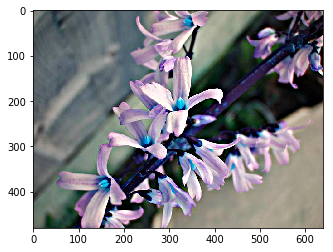

In [25]:
dst = unshark_mask(src,100)
plt.imshow(dst)